In [57]:
# import necessary libraries
import pandas as pd
import os
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

In [6]:
# import Prices and Features CSVs
prices = pd.read_csv("hotels-europe_price.csv")
features = pd.read_csv("hotels-europe_features.csv")

In [30]:
# Merge tables using hotel_id
df = prices.merge(features, on ="hotel_id")

In [31]:
df_naples = df.loc[df['city']=="Naples"]

In [36]:
# look at our df
df_naples.T

,83947,83948,83949,83950,83951,83952,83953,83954,83955,83956,...,87711,87712,87713,87714,87715,87716,87717,87718,87719,87720
hotel_id,11706,11706,11706,11706,11707,11707,11707,11707,11707,11707,...,12213,12213,12213,12213,12213,12213,12214,12214,12214,12214
price,278,69,69,69,43,72,49,43,49,181,...,76,81,76,76,81,76,81,81,349,81
offer,0,0,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
offer_cat,0% no offer,0% no offer,0% no offer,0% no offer,15-50% offer,0% no offer,15-50% offer,15-50% offer,15-50% offer,15-50% offer,...,1-15% offer,1-15% offer,1-15% offer,1-15% offer,1-15% offer,1-15% offer,0% no offer,0% no offer,0% no offer,0% no offer
year,2017,2017,2017,2017,2018,2018,2018,2018,2017,2017,...,2018,2017,2018,2017,2017,2018,2017,2017,2017,2017
month,12,11,12,11,1,3,5,4,11,12,...,3,12,5,11,11,4,12,11,12,11
weekend,0,0,0,1,1,1,1,1,1,0,...,1,0,1,1,0,1,0,0,0,1
holiday,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
nnights,4,1,1,1,1,1,1,1,1,4,...,1,1,1,1,1,1,1,1,4,1
scarce_room,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1


In [33]:
# use hotel user ratings to create a binary variable: highly_rated=1 if rating ≥ 4, 0 otherwise
df_naples['highly_rated'] = [1 if r >= 4 else 0 for r in df_naples['rating']]

In [35]:
df_naples['highly_rated'].value_counts()

0    1954
1    1820
Name: highly_rated, dtype: int64

In [43]:
f'There are {df_naples["hotel_id"].nunique()} uniqe hotels in this table.'

'There are 509 uniqe hotels in this table.'

Task 1. Examine how high rating is related to the other hotel features in the data
- price (ln?)
- distance
- stars
- rating-reviewcount?
- neighbourhood
- accommodation_type

    Which ones should we look at?


### Price Filtering

<Axes: title={'center': 'Fig1: Price Distribution'}, xlabel='Price', ylabel='Number of Accomodations'>

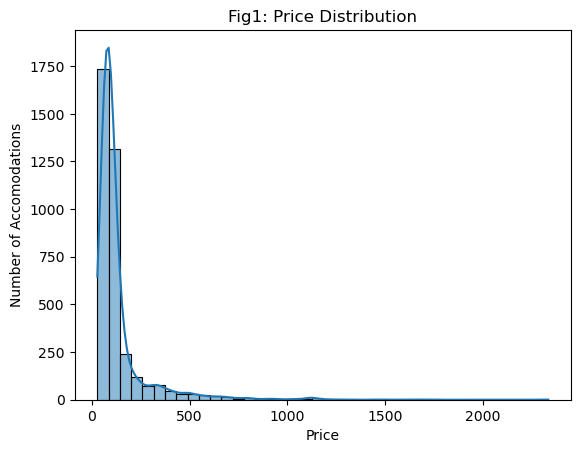

In [79]:
# Make a hist of the prices from the raw data
fig1 = sns.histplot(df_naples['price'],bins=40 ,kde=True)
fig1.set(title='Fig1: Price Distribution', xlabel='Price', ylabel='Number of Accomodations')
fig1

In [72]:
# Get an idea about outliers
df_naples['price'].describe(percentiles=[0.5,0.95])

count    3774.000000
mean      133.955750
std       151.861088
min        28.000000
50%        89.000000
95%       405.000000
max      2335.000000
Name: price, dtype: float64

In [81]:
# filter out outliers, which are probably errors or luxury hotels
filtered_naples = df_naples.loc[df_naples['price'] <= 450]

<Axes: title={'center': 'Fig2: Filtered Price Distribution'}, xlabel='Price', ylabel='Number of Accomodations'>

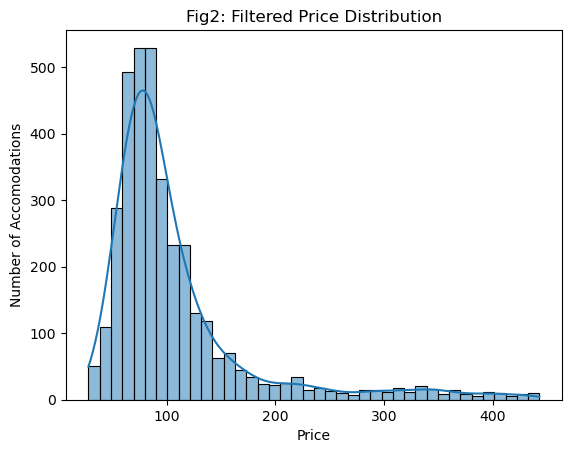

In [83]:
# Make a hist of the prices without outliers
fig2 = sns.histplot(filtered_naples['price'],bins=40 ,kde=True)
fig2.set(title='Fig2: Filtered Price Distribution', xlabel='Price', ylabel='Number of Accomodations')
fig2

In [84]:
# create log price
filtered_naples["lnp"] = np.log(filtered_naples["price"])

<Axes: title={'center': 'Fig3: Natural Logarithm of Price Distribution'}, xlabel='Ln Price', ylabel='Number of Accomodations'>

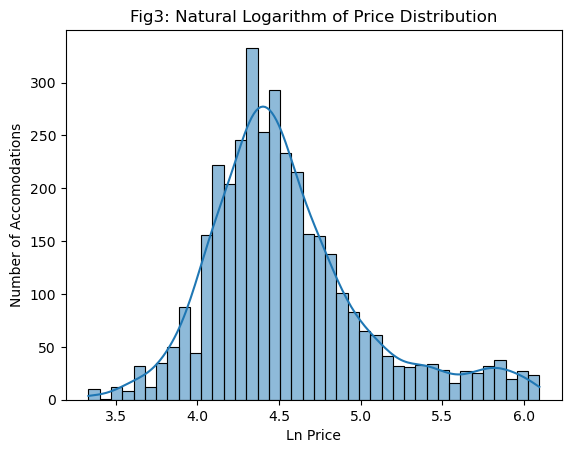

In [76]:
fig3 = sns.histplot(filtered_naples["lnp"],bins=40 ,kde=True)
fig3.set(title='Fig3: Natural Logarithm of Price Distribution', xlabel='Ln Price', ylabel='Number of Accomodations')
fig3

In [19]:
# lowess for splines